# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime

### Setting Graph Style

In [2]:
sns.set_theme(style = 'darkgrid')

# Importing Data

In [3]:
netflix = pd.read_csv('netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Inspecting the Data

In [4]:
(netflix.isnull().sum()/len(netflix)) * 100

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64

# Preprocessing

In [5]:
# filling missing values for each variables
netflix['director'] = netflix['director'].fillna(value = 'No Director')
netflix['cast'] = netflix['cast'].fillna(value = 'No Cast')
netflix['country'] = netflix['country'].fillna(value = 'Unknown')
netflix['date_added'] = netflix['date_added'].fillna(value = datetime.datetime(2020, 1,1))

In [6]:
(netflix.isnull().sum()/len(netflix)) * 100

show_id         0.000000
type            0.000000
title           0.000000
director        0.000000
cast            0.000000
country         0.000000
date_added      0.000000
release_year    0.000000
rating          0.089893
duration        0.000000
listed_in       0.000000
description     0.000000
dtype: float64

# Genres Distribution between Movies and TV Shows

In [7]:
genre_list = []
clean_df = netflix.dropna(subset = ['listed_in'])
clean_df.reset_index(inplace = True)

for i, element in clean_df.iterrows():
    type_show = element['type']
    for genre in str(element['listed_in']).strip(' ').split(','):
        genre_list.append([type_show, genre.strip()])

genre_data = pd.DataFrame(data = genre_list, columns = ['type', 'genre'])

In [8]:
genre_movies = genre_data[(genre_data['type'] == 'Movie')].value_counts().nlargest(10).to_frame() 
genre_movies.reset_index(level=[0,1], inplace=True)
genre_movies.rename(columns = {0: 'count'}, inplace= True)
genre_movies

,type,genre,count
0,Movie,International Movies,2437
1,Movie,Dramas,2106
2,Movie,Comedies,1471
3,Movie,Documentaries,786
4,Movie,Action & Adventure,721
5,Movie,Independent Movies,673
6,Movie,Children & Family Movies,532
7,Movie,Romantic Movies,531
8,Movie,Thrillers,491
9,Movie,Stand-Up Comedy,329


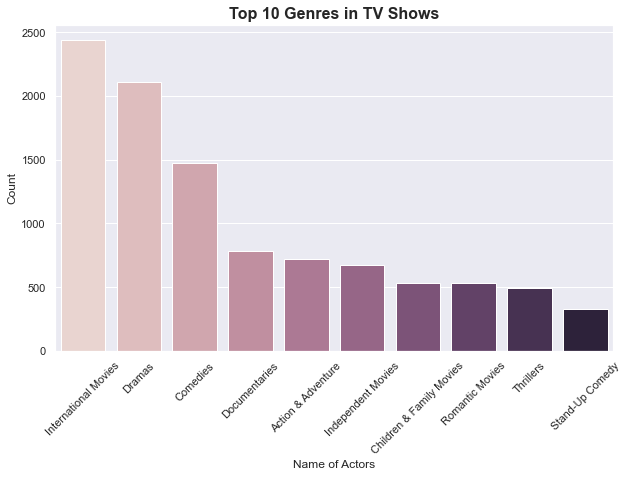

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'genre', y = 'count', data = genre_movies, palette = sns.cubehelix_palette(10))
plt.title('Top 10 Genres in TV Shows', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Name of Actors')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

In [10]:
genre_tv = genre_data[(genre_data['type'] == 'TV Show')].value_counts().nlargest(10).to_frame() 
genre_tv.reset_index(level=[0,1], inplace=True)
genre_tv.rename(columns = {0: 'count'}, inplace= True)
genre_tv

,type,genre,count
0,TV Show,International TV Shows,1199
1,TV Show,TV Dramas,704
2,TV Show,TV Comedies,525
3,TV Show,Crime TV Shows,427
4,TV Show,Kids' TV,414
5,TV Show,Docuseries,353
6,TV Show,Romantic TV Shows,333
7,TV Show,British TV Shows,232
8,TV Show,Reality TV,222
9,TV Show,TV Action & Adventure,150


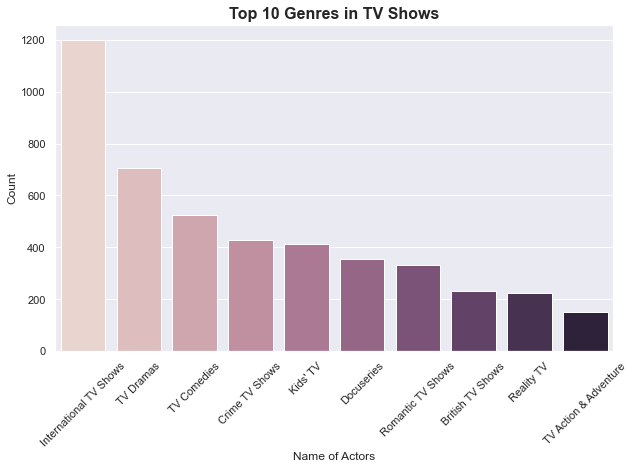

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'genre', y = 'count', data = genre_tv, palette = sns.cubehelix_palette(10))
plt.title('Top 10 Genres in TV Shows', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Name of Actors')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

# Content Type Distibution in the World

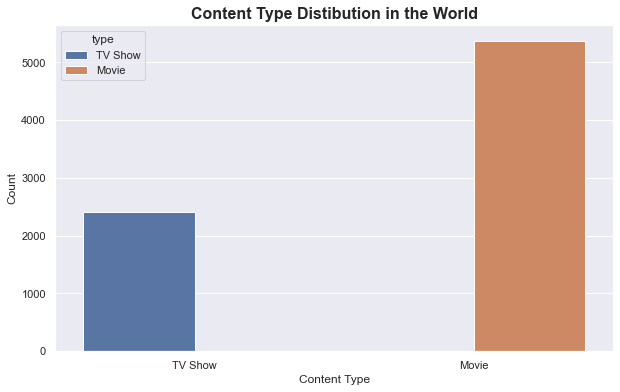

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(x = 'type', hue = 'type', data = netflix)
plt.title('Content Type Distibution in the World', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

# The Growth between Movies and TV Shows over the years

In [13]:
tv_movies_count = (netflix[netflix['release_year'] < 2021]
                  .groupby(by = ['type', 'release_year'], as_index = False)['show_id']
                  .count())
tv_movies_count.rename(columns = {'show_id': 'count'}, inplace = True)
tv_movies_count

,type,release_year,count
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
111,TV Show,2016,240
112,TV Show,2017,268
113,TV Show,2018,387
114,TV Show,2019,414


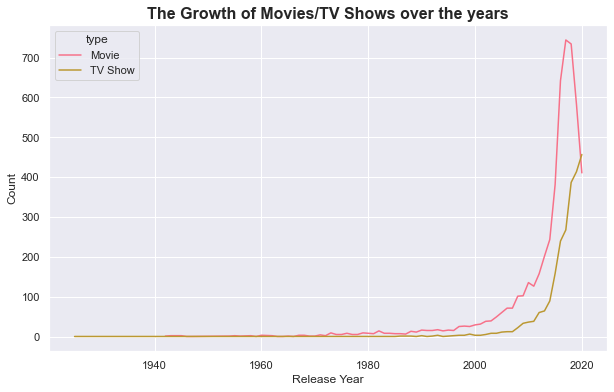

In [14]:
sns.set_palette("husl")
plt.figure(figsize = (10, 6))
sns.lineplot(x = 'release_year', y = 'count', hue = 'type', data = tv_movies_count)
plt.title('The Growth of Movies/TV Shows over the years', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

# Director Analysis for Movies and TV Shows

In [15]:
directors_list = []
clean_df = netflix.dropna(subset = ['director'])
clean_df.reset_index(inplace = True)

for i, element in clean_df.iterrows():
    type_show = element['type']
    for director in str(element['director']).split(','):
        directors_list.append([type_show, director.strip()])

director_data = pd.DataFrame(data = directors_list, columns = ['type', 'director'])

In [16]:
director_data

,type,director
0,TV Show,No Director
1,Movie,Jorge Michel Grau
2,Movie,Gilbert Chan
3,Movie,Shane Acker
4,Movie,Robert Luketic
...,...,...
8499,Movie,Josef Fares
8500,Movie,Mozez Singh
8501,Movie,No Director
8502,TV Show,No Director


In [17]:
directors_movies = director_data[(director_data['type'] == 'Movie') & (director_data['director'] != 'No Director')].value_counts().nlargest(10).to_frame() 
directors_movies.reset_index(level=[0,1], inplace=True)
directors_movies.rename(columns = {0: 'count'}, inplace= True)
directors_movies

,type,director,count
0,Movie,Jan Suter,21
1,Movie,Raúl Campos,19
2,Movie,Jay Karas,15
3,Movie,Marcus Raboy,15
4,Movie,Cathy Garcia-Molina,13
5,Movie,Jay Chapman,12
6,Movie,Youssef Chahine,12
7,Movie,Martin Scorsese,12
8,Movie,Steven Spielberg,10
9,Movie,Shannon Hartman,9


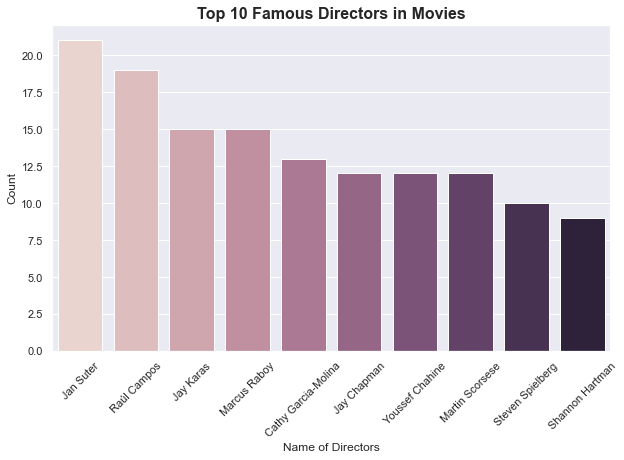

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'director', y = 'count', data = directors_movies, palette = sns.cubehelix_palette(10))
plt.title('Top 10 Famous Directors in Movies', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Name of Directors')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

In [19]:
directors_tv = director_data[(director_data['type'] == 'TV Show') & (director_data['director'] != 'No Director')].value_counts().nlargest(10).to_frame() 
directors_tv.reset_index(level=[0,1], inplace=True)
directors_tv.rename(columns = {0: 'count'}, inplace= True)

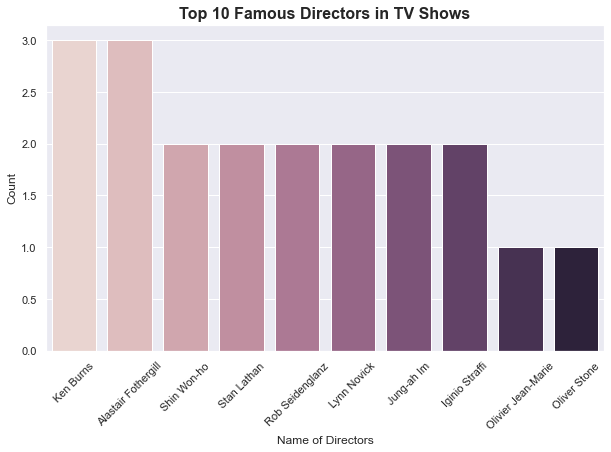

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'director', y = 'count', data = directors_tv, palette = sns.cubehelix_palette(10))
plt.title('Top 10 Famous Directors in TV Shows', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Name of Directors')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

# Actors Analysis for Movies and TV Shows

In [21]:
actors_list = []
clean_df = netflix.dropna(subset = ['cast'])
clean_df.reset_index(inplace = True)

for i, element in clean_df.iterrows():
    type_show = element['type']
    for cast in str(element['cast']).split(','):
        actors_list.append([type_show, cast.strip()])

actor_data = pd.DataFrame(data = actors_list, columns = ['type', 'cast'])

In [22]:
actors_movies = actor_data[(actor_data['type'] == 'Movie') & (actor_data['cast'] != 'No Cast')].value_counts().nlargest(10).to_frame() 
actors_movies.reset_index(level=[0,1], inplace=True)
actors_movies.rename(columns = {0: 'count'}, inplace= True)

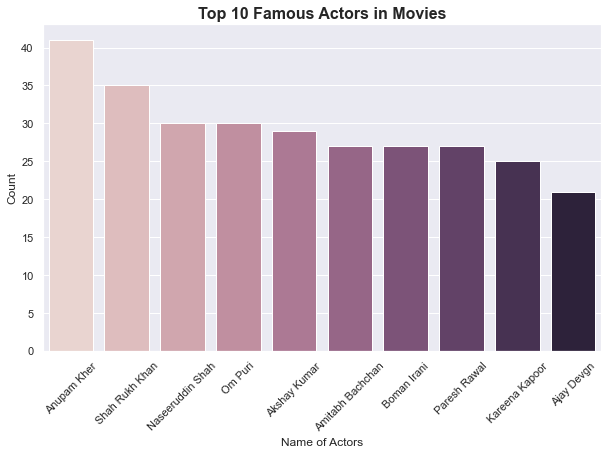

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'cast', y = 'count', data = actors_movies, palette = sns.cubehelix_palette(10))
plt.title('Top 10 Famous Actors in Movies', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Name of Actors')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()

In [24]:
actors_tv = actor_data[(actor_data['type'] == 'TV Show') & (actor_data['cast'] != 'No Cast')].value_counts().nlargest(10).to_frame() 
actors_tv.reset_index(level=[0,1], inplace=True)
actors_tv.rename(columns = {0: 'count'}, inplace= True)

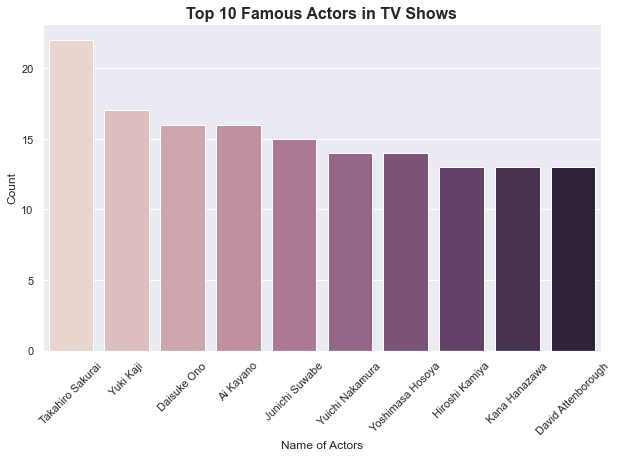

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'cast', y = 'count', data = actors_tv, palette = sns.cubehelix_palette(10))
plt.title('Top 10 Famous Actors in TV Shows', fontdict = {'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Name of Actors')
plt.xticks(rotation = 45)
plt.ylabel('Count')
plt.show()